In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rkf12(f, t0, y0, t_end, h_init, tol):
    """
    Runge-Kutta-Fehlberg method (RKF1/2) for solving ODE y' = f(t, y) with adaptive step size.

    Parameters:
    - f: Function f(t, y) for the ODE.
    - t0: Initial time.
    - y0: Initial value.
    - t_end: Final time.
    - h_init: Initial step size.
    - tol: Tolerance for adaptive step size.

    Returns:
    - t: Array of time values.
    - y: Array of y values.
    """
    t = [t0]
    y = [y0]
    h = h_init

    while t[-1] < t_end:
        # Ensure the step size does not overshoot the endpoint
        if t[-1] + h > t_end:
            h = t_end - t[-1]
        
        # Current time and value
        ti = t[-1]
        yi = y[-1]
        
        # First-order approximation (Euler method)
        y1 = yi + h * f(ti, yi)
        
        # Second-order approximation (Midpoint method)
        y2 = yi + h * f(ti + h / 2, yi + (h / 2) * f(ti, yi))
        
        # Error estimate
        error = np.abs(y2 - y1)
        
        # Check error and adjust step size
        if error < tol:
            # Accept the step
            t.append(ti + h)
            y.append(y2)
        
        # Adjust the step size
        if error == 0:
            h = h * 2  # Prevent division by zero
        else:
            h = h * min(2, 0.9 * (tol / error) ** 0.5)

    return np.array(t), np.array(y)

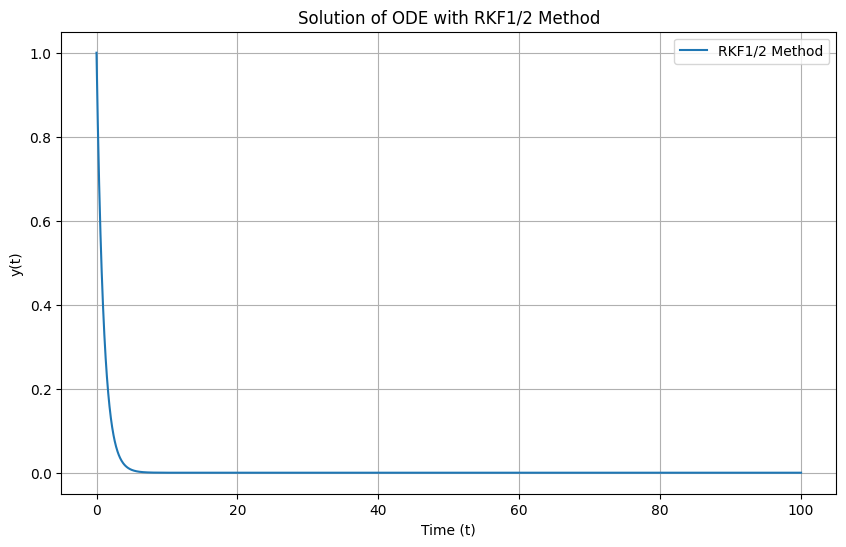

In [3]:
# Example usage
# Define the ODE y' = -y (exponential decay)
def f(t, y):
    return -y

# Parameters
t0 = 0.0
y0 = 1.0
t_end = 100.0
h_init = 0.1
tol = 1e-4

# Solve using RKF1/2
t, y = rkf12(f, t0, y0, t_end, h_init, tol)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="RKF1/2 Method")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Solution of ODE with RKF1/2 Method")
plt.legend()
plt.grid()
plt.show()
